# Partial Differential Equations

So far in the course we have only dealt with lumped parameter examples, that is where we assume that the variables are only functions of time, $f(t)$. Lumped parameter models are very useful in describing systems but they have to sacrifice accuracy. This is the case when perfect mixing is assumed or a constant temperature for a cooling jacket. Now we will look at an example where the variables are functions of time and space, $f(t,z)$. 

### Example:
![](PDEpipe.png)

Here we look at the flow of a compressible liquid through a pipe that has both molar diffusion and a chemical reaction. We assume that there are no radial gradients. The cross sectional area of the pipe is given as $A$ ($m^2$). In order to write a balance for species A over the length of the pipe we have to take into account both position ($z$) and time ($t$). We will look at the section $dz$ as out system and we will conduct a balance over the system boundaries. 

The chemical reaction is assumed to be first order and is given by:

$$ R = kC_A $$

Then the change is concentration of A due to the reaction is given by:

$$ -kC_A A dz $$

Fick's law is used to account for the molar flow due to diffusion: 

$$ N_A = -D_A \frac{dC_A}{dz} $$

$N_A = {mol_A}/{s~ m^2}$

The inlet to the system is given by the sum of the bulk flow and diffusion:

$$ v(t,z)C_A(t,z)A + AN_A $$

The outlet of the system now has to be approximated by assuming a linear extrapolation from $z$ to $z + dz$. This is done with a first order Taylor series expansion. The smaller $dz$ become the better the approximation.


![](taylor1.png)

$$f(z) \approx f(z_r) + \dfrac{d}{dz}f(z_r) \big(z - z_r\big)$$

Then it follows that the outlet is written by:
$$ v C_A A + AN_A + \frac{d}{dz}\big(v C_AA + AN_A\big)(z + dz - z) $$

Finally the accumulation term is given by:

$$ \frac{d}{dt}C_A A dz $$

Now if we combine all these equations we are able to describe the conservation of species A for time and position. But it can use some simplification.

$$ \frac{d}{dt}C_A A dz = v C_A A + AN_A - \big(v C_A A + AN_A + \frac{d}{dz}(v C_AA + AN_A)dz\big) - kC_A A dz $$

Subtracting like terms and dividing through by $dz$:

$$ \frac{d}{dt}C_A A  = - \frac{d}{dz}\big(v C_AA + AN_A\big) - kC_A A$$

Substituting for $N_A$ and dividing through by A gives:

$$  \frac{d}{dz}(D_A \frac{dC_A}{dz}) = \frac{d}{dt}C_A + \frac{d}{dz}(v C_A ) + kC_A$$

And finally solving for the diffusion term gives us:

$$  D_A \frac{d^2C_A}{dz^2} = \frac{d}{dt}C_A + \frac{d}{dz}(v C_A ) + kC_A$$

The diffusion term is a second order term.

Now to try this using Sympy. It is a symbolic math model in python, that can help us to deal with complex equations and operations.

In [2]:
import sympy
sympy.init_printing()

In [3]:
k,Na,Da,z,t,A,dz = sympy.symbols('k,N_A,D_A,z,t,A,dz') 
Ca = sympy.Function('C_A')(t,z)
v = sympy.Function('v')(t,z)

In [4]:
reaction = -k*Ca*A*dz
ficks = -Da * Ca.diff(z)
inlet = v*Ca*A + ficks*A
outlet = inlet + inlet.diff(z)*dz
accumulation = A*Ca.diff(t)*dz

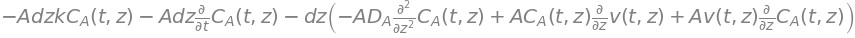

In [5]:
eq = ((inlet - outlet + reaction) - accumulation)
eq

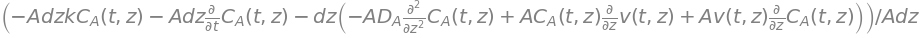

In [6]:
eq1 = eq/(A*dz)
eq1

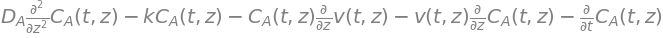

In [7]:
eq1.simplify()